Esse documento traz análises para dados de **Ocorrências Aeronáuticas** por **LARISSA SAYURI FUTINO C. dos SANTOS**

# Bibliotecas

In [168]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt   # gráfico barras com o eixo-x rotacionado
import calmap

In [4]:
caminho_arqs = '/home/lenovo/projects/brazil-flights-events/'
caminho_dados = caminho_arqs + 'data/'

# Funcoes

In [160]:
def create_barplot_xaxisrot(x, y, labels, xaxis, yaxis, title, figsizex, figsizey):
    # create a larger figure
    plt.figure(figsize=(figsizex, figsizey))
    # Plot bar chart
    plt.bar(x, y, tick_label=labels)
    # Add labels and title
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    # Rotate x-axis ticks
    plt.xticks(rotation=45)
    # Show plot
    plt.show()

In [164]:
def create_barplot_xaxisrot_threshold(x, y, labels, xaxis, yaxis, title, figsizex, figsizey, threshold):
    # create a larger figure
    plt.figure(figsize=(figsizex, figsizey))
    # Plot bar chart
    plt.bar(x, y, tick_label=labels)
    # Add labels and title
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(title)
    # Rotate x-axis ticks
    plt.xticks(rotation=0)
    # Horizontal line for threshold
    plt.axhline(y=threshold,linewidth=1, color='k')

    # Show plot
    plt.show()

# Dados

In [10]:
# Dados de ocorrência
ocorrencia = pd.read_csv(caminho_dados + 'ocorrencia.csv')

# Dados de Aeronave
aeronave = pd.read_csv(caminho_dados + 'aeronave.csv')

In [62]:
# Criando variáveis
ocorrencia['ano'] = ocorrencia['dia_ocorrencia'].astype(str).str[:4]
ocorrencia['mes'] = ocorrencia['dia_ocorrencia'].astype(str).str[5:7]

# Variáveis - Análise Univariada

### Ocorrência

1. codigo_ocorrencia 
    * qualitativa nominal
   
Checando se há repetições de ocorrência na base. Não é o caso. Todos os códigos aparecem uma única vez.

In [16]:
ocorrencia["codigo_ocorrencia"].value_counts().value_counts()

1    2027
Name: codigo_ocorrencia, dtype: int64

2. classificacao
    * qualitativa ordinal
    
Há 2.67 mais 'acidentes' do que 'incidentes graves' no histórico.

In [17]:
ocorrencia["classificacao"].value_counts()

ACIDENTE           1475
INCIDENTE GRAVE     552
Name: classificacao, dtype: int64

3. tipo
    * qualitativa nominal (ordinal?)
    
São 49 tipos diferentes de ocorrências. Eu diria que há uma ordem de criticidade entre elas mas precisaria consultar um especialista.

In [152]:
tipo = ocorrencia["tipo"].value_counts().to_frame()
tipo = tipo.rename(columns = {"tipo": "freq_abs"})

perc_tipo = tipo/sum(tipo["freq_abs"])
perc_tipo = perc_tipo.rename(columns = {"freq_abs": "freq_rel"})

cumsum_tipo = np.cumsum(perc_tipo["freq_rel"]).to_frame()
cumsum_tipo = cumsum_tipo.rename(columns = {"freq_rel": "freq_rel_acum"})

df_tipo = pd.concat([tipo, perc_tipo, cumsum_tipo], axis=1)

df_tipo

,freq_abs,freq_rel,freq_rel_acum
FALHA DO MOTOR EM VOO,377,0.185989,0.185989
PERDA DE CONTROLE NO SOLO,325,0.160335,0.346325
PERDA DE CONTROLE EM VOO,310,0.152935,0.499260
COLISÃO EM VOO COM OBSTÁCULO,142,0.070054,0.569314
COM TREM DE POUSO,130,0.064134,0.633448
OUTROS TIPOS,87,0.042921,0.676369
PANE SECA,74,0.036507,0.712876
FALHA DE SISTEMA / COMPONENTE,61,0.030094,0.742970
INDETERMINADA,57,0.028120,0.771090
POUSO SEM TREM,54,0.026640,0.797731


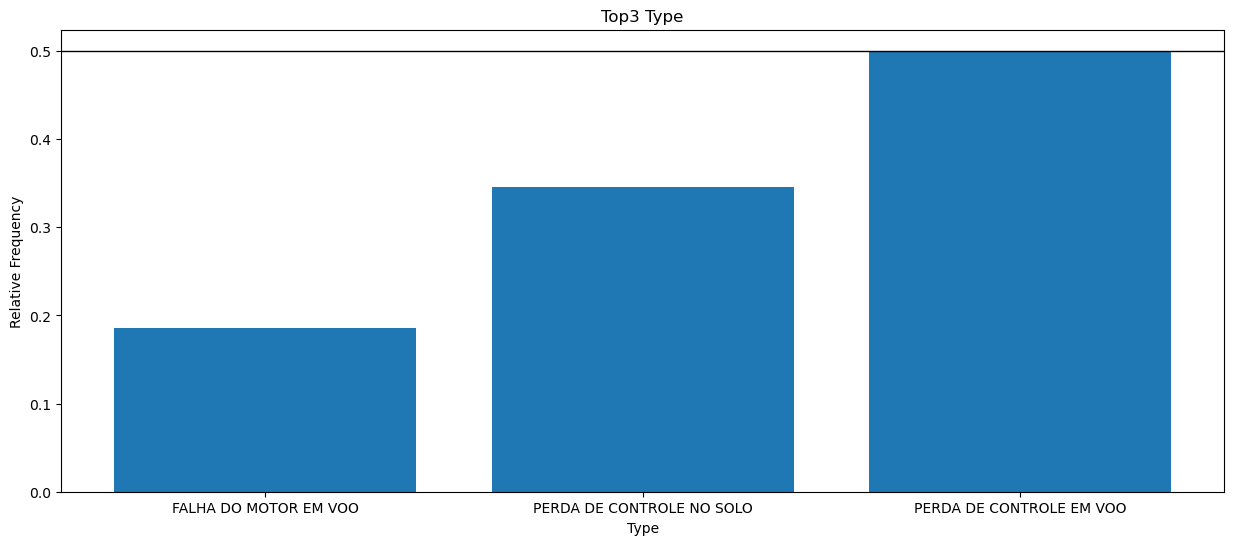

In [166]:
df_tipo_top3 = df_tipo[0:3]

create_barplot_xaxisrot_threshold(x = df_tipo_top3.index, y = df_tipo_top3['freq_rel_acum'], labels = df_tipo_top3.index, 
                                xaxis = 'Type', yaxis = 'Relative Frequency', title = 'Top3 Type',
                                figsizex = 15, figsizey = 6,
                                 threshold = 0.5)

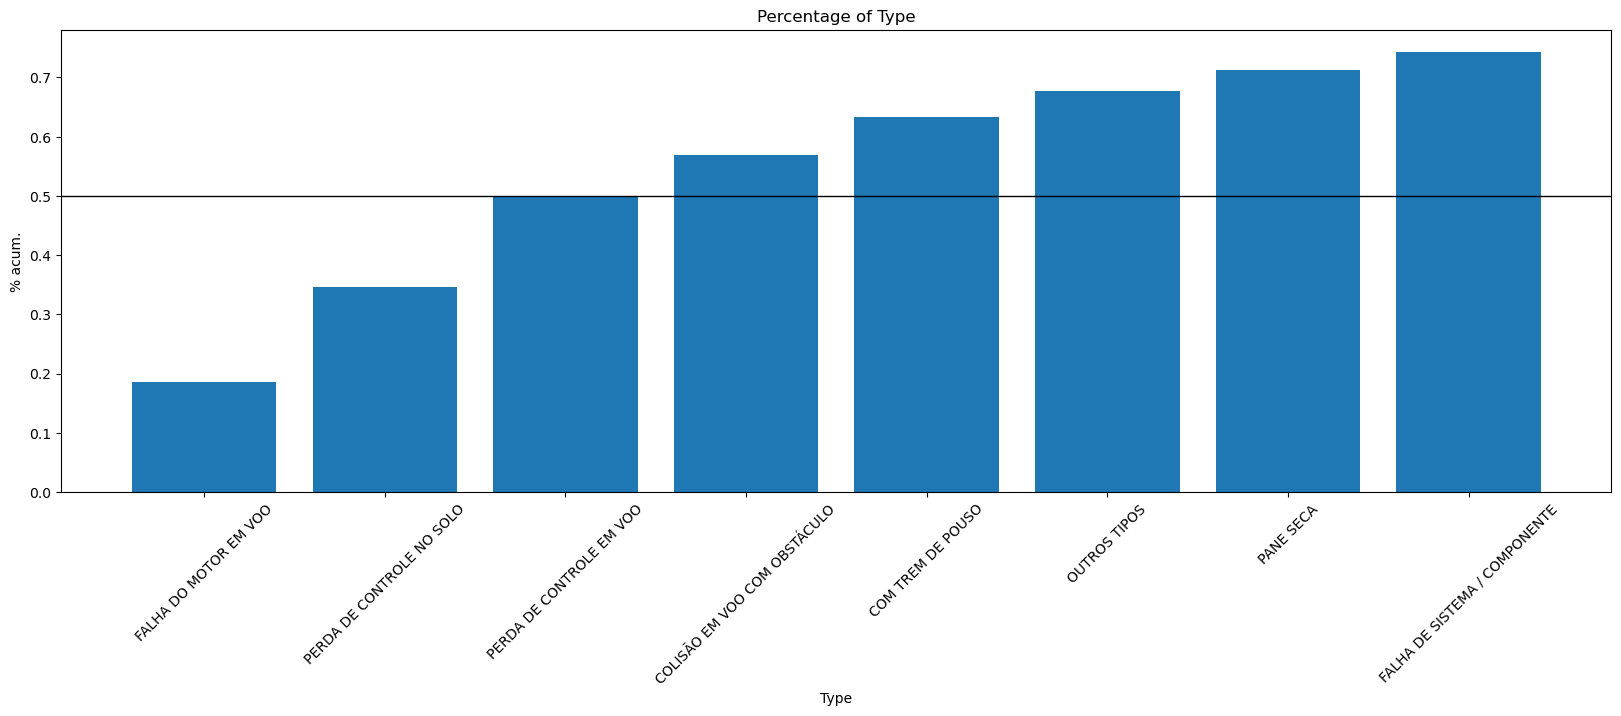

In [159]:
df_tipo_top8 = df_tipo[0:8]

create_barplot_xaxisrot_threshold(x = df_tipo_top8.index, y = df_tipo_top8['freq_rel_acum'], labels = df_tipo_top8.index, 
                                xaxis = 'Type', yaxis = '% acum.', title = 'Percentage of Type',
                                figsizex = 20, figsizey = 6,
                                 threshold = 0.5)

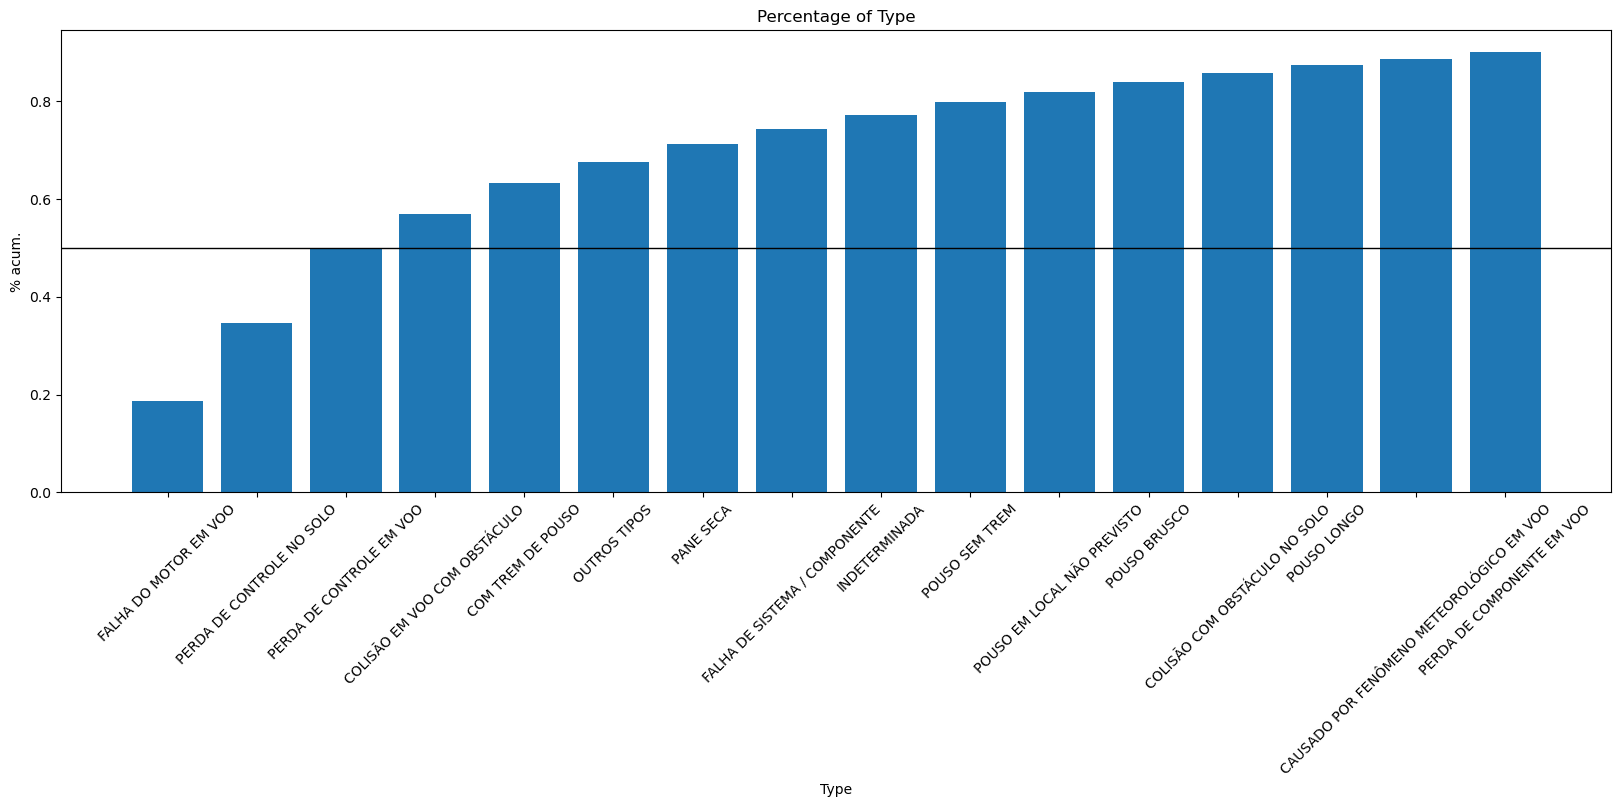

In [156]:
df_tipo_top20 = df_tipo[0:16]

create_barplot_xaxisrot_threshold(x = df_tipo_top20.index, y = df_tipo_top20['freq_rel_acum'], labels = df_tipo_top20.index, 
                                xaxis = 'Type', yaxis = '% acum.', title = 'Percentage of Type',
                                figsizex = 20, figsizey = 6,
                                 threshold = 0.5)

In [167]:
df_tipo_top20

,freq_abs,freq_rel,freq_rel_acum
FALHA DO MOTOR EM VOO,377,0.185989,0.185989
PERDA DE CONTROLE NO SOLO,325,0.160335,0.346325
PERDA DE CONTROLE EM VOO,310,0.152935,0.499260
COLISÃO EM VOO COM OBSTÁCULO,142,0.070054,0.569314
COM TREM DE POUSO,130,0.064134,0.633448
OUTROS TIPOS,87,0.042921,0.676369
PANE SECA,74,0.036507,0.712876
FALHA DE SISTEMA / COMPONENTE,61,0.030094,0.742970
INDETERMINADA,57,0.028120,0.771090
POUSO SEM TREM,54,0.026640,0.797731


Há 07 tipos de incidentes que ocorrem apenas 01 vez:

In [36]:
tipo[tipo['tipo'] == 1]

,tipo
COM LANÇAMENTO DE CARGA,1
FUMAÇA NA CABINE,1
COLISÃO EM VOO COM OBJETO REBOCADO,1
FOD - DANO CAUSADO POR OBJETO ESTRANHO,1
COM LANÇAMENTO DE PESSOAS,1
COLISÃO DE VEÍCULO COM AERONAVE,1
INCURSÃO EM PISTA,1


4. localidade
    * qualitativa nominal
    
As ocorrências ocorreram em 815 municípios diferentes.
Os 05 municípios com mais ocorrências são:

In [116]:
ocorr_loc = ocorrencia["localidade"].value_counts().to_frame()
ocorr_loc = ocorr_loc.rename(columns={"localidade": "freq_abs"})
ocorr_loc[0:10]

,freq_abs
RIO DE JANEIRO,64
SÃO PAULO,47
GOIÂNIA,41
BRASÍLIA,30
MANAUS,29
BELO HORIZONTE,26
CAMPO GRANDE,24
LONDRINA,23
PORTO ALEGRE,22
BRAGANÇA PAULISTA,22


In [44]:
len(ocorr_loc)

815

5. uf
    * qualitativa nominal
    
* Ocorrências em todo o território nacional: 26 UFs e no DF
* E 08 ocorrências no Exterior
* E 02 não identificadas

In [108]:
uf = ocorrencia["uf"].value_counts().to_frame()
uf = uf.rename(columns={"uf": "freq_abs"})

perc_uf = uf/sum(uf["freq_abs"])
perc_uf = perc_uf.rename(columns={"freq_abs": "freq_rel"})

cumsum_uf = np.cumsum(perc_uf["freq_rel"]).to_frame()
cumsum_uf = cumsum_uf.rename(columns={"freq_rel": "freq_rel_acum"})

df_uf = pd.concat([uf, perc_uf,cumsum_uf], axis=1)

df_uf

,freq_abs,freq_rel,freq_rel_acum
SP,434,0.214110,0.214110
RS,169,0.083374,0.297484
PR,154,0.075974,0.373458
MT,153,0.075481,0.448939
MG,152,0.074988,0.523927
GO,141,0.069561,0.593488
RJ,120,0.059201,0.652689
PA,119,0.058707,0.711396
BA,83,0.040947,0.752343
AM,81,0.039961,0.792304


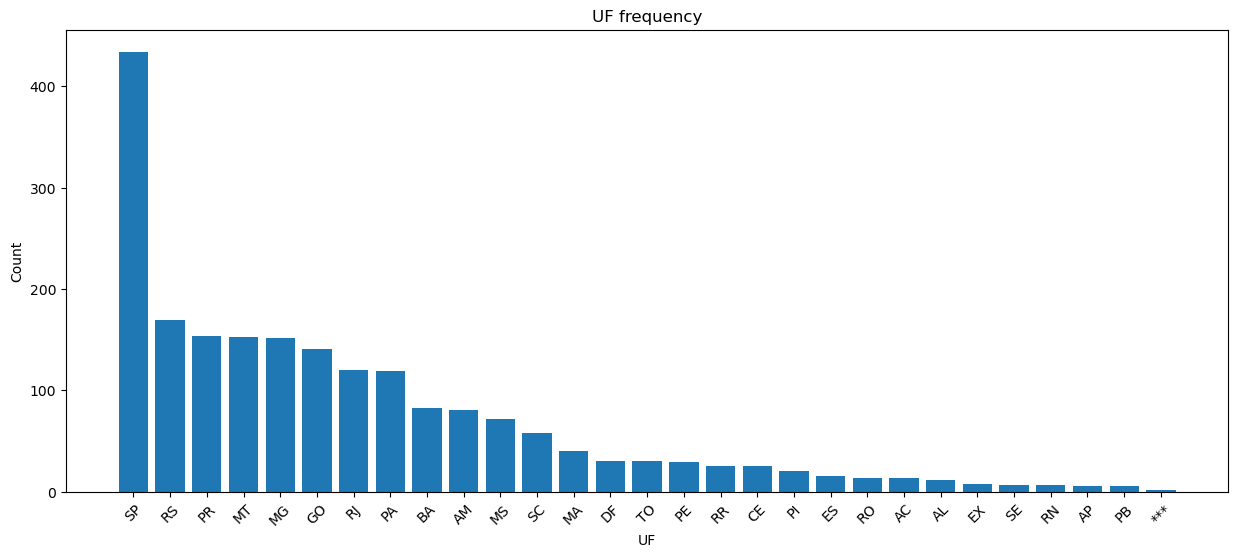

In [109]:
create_barplot_xaxisrot(x = df_uf.index, y = df_uf['freq_abs'], labels = df_uf.index, 
                        xaxis = 'UF', yaxis = 'Count', title = 'UF frequency',
                      figsizex = 15, figsizey = 6)

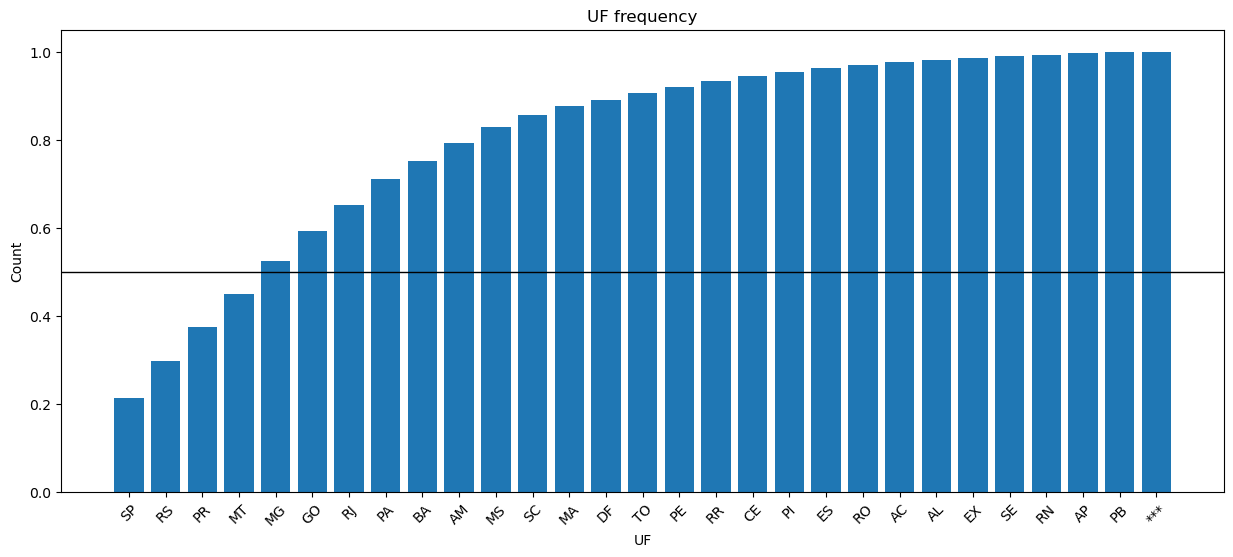

In [112]:
create_barplot_xaxisrot_threshold(x = df_uf.index, y = df_uf['freq_rel_acum'], labels = df_uf.index, 
                                xaxis = 'UF', yaxis = 'Count', title = 'UF frequency',
                                figsizex = 15, figsizey = 6,
                                 threshold = 0.5)

In [52]:
ocorrencia[ocorrencia["uf"] == "EX"]

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
2018,31375,ACIDENTE,FALHA DO MOTOR EM VOO,EXTERIOR,EX,PARAGUAI,****,2007-09-28,00:00:00,***,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2019,60879,ACIDENTE,COLISÃO EM VOO COM OBSTÁCULO,EXTERIOR,EX,PARAGUAI,****,2008-02-03,20:40:00,NÃO,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2020,30915,ACIDENTE,PERDA DE CONTROLE NO SOLO,EXTERIOR,EX,URUGUAI,****,2007-02-16,00:00:00,***,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2021,34081,ACIDENTE,COM TREM DE POUSO,EXTERIOR,EX,URUGUAI,****,2008-07-02,00:00:00,***,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2022,36116,INCIDENTE GRAVE,PERDA DE COMPONENTE EM VOO,MEDELLIN,EX,COLÔMBIA,****,2009-03-26,04:46:00,***,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2023,33715,INCIDENTE GRAVE,OUTROS TIPOS,LIMA,EX,PERU,****,2006-10-31,00:00:00,***,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2024,25839,ACIDENTE,COLISÃO COM OBSTÁCULO NO SOLO,MENDONZA,EX,ARGENTINA,****,2006-01-03,00:00:00,***,CENIPA,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
2026,53403,ACIDENTE,OUTROS TIPOS,CAMBERLEY,EX,INGLATERRA,EGLK,2015-07-31,14:08:00,***,EXTERIOR,NaN,NaN,NaN,NaN,0,1,1.0,2016-07-30


6. pais	
    * qualitativa nominal
    
As 08 ocorrências fora do Brasil aconteceram nos seguintes países:

In [53]:
ocorrencia["pais"].value_counts()

BRASIL        2019
PARAGUAI         2
URUGUAI          2
COLÔMBIA         1
PERU             1
ARGENTINA        1
INGLATERRA       1
Name: pais, dtype: int64

7. aerodromo
    * qualitativa nominal
    
* Aeródromo é a _área delimitada em terra, ou mesmo na água, destinada para pouso, decolagem e movimentação de aeronaves._
* Como é uma variável com muitas observações (1217 de 2027, mais de 60%) não disponíveis não devo utilizar nas análises

In [54]:
ocorrencia["aerodromo"].value_counts()

****    1217
SBMT      18
SBBP      17
SBJR      15
SWNV      15
        ... 
SNEB       1
SSDP       1
SSCT       1
SDWS       1
EGLK       1
Name: aerodromo, Length: 306, dtype: int64

8. dia_ocorrencia
    * data
    
* Calendar plot?

In [57]:
ocorrencia["dia_ocorrencia"].sort_values()

1892    2006-01-02
130     2006-01-02
2024    2006-01-03
1474    2006-01-08
1148    2006-01-12
           ...    
639     2015-12-15
1586    2015-12-17
1558    2015-12-24
1246    2015-12-28
1296    2015-12-31
Name: dia_ocorrencia, Length: 2027, dtype: object

/home/lenovo/anaconda3/lib/python3.10/site-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/home/lenovo/anaconda3/lib/python3.10/site-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]
/home/lenovo/anaconda3/lib/python3.10/site-packages/calmap/__init__.py:202: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  plot_data = by_day.pivot("day", "week", "data").values[::-1]
/home/lenovo/anaconda3/lib/python3.10/site-packages/calmap/__init__.py:206: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  fill_data = by_day.pivot("day", "week", "fill").values[::-1]
/home/lenovo/anaconda3/lib/python3.10/site-p

(<Figure size 2000x1400 with 10 Axes>,
 array([<Axes: ylabel='2006'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2015'>], dtype=object))

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

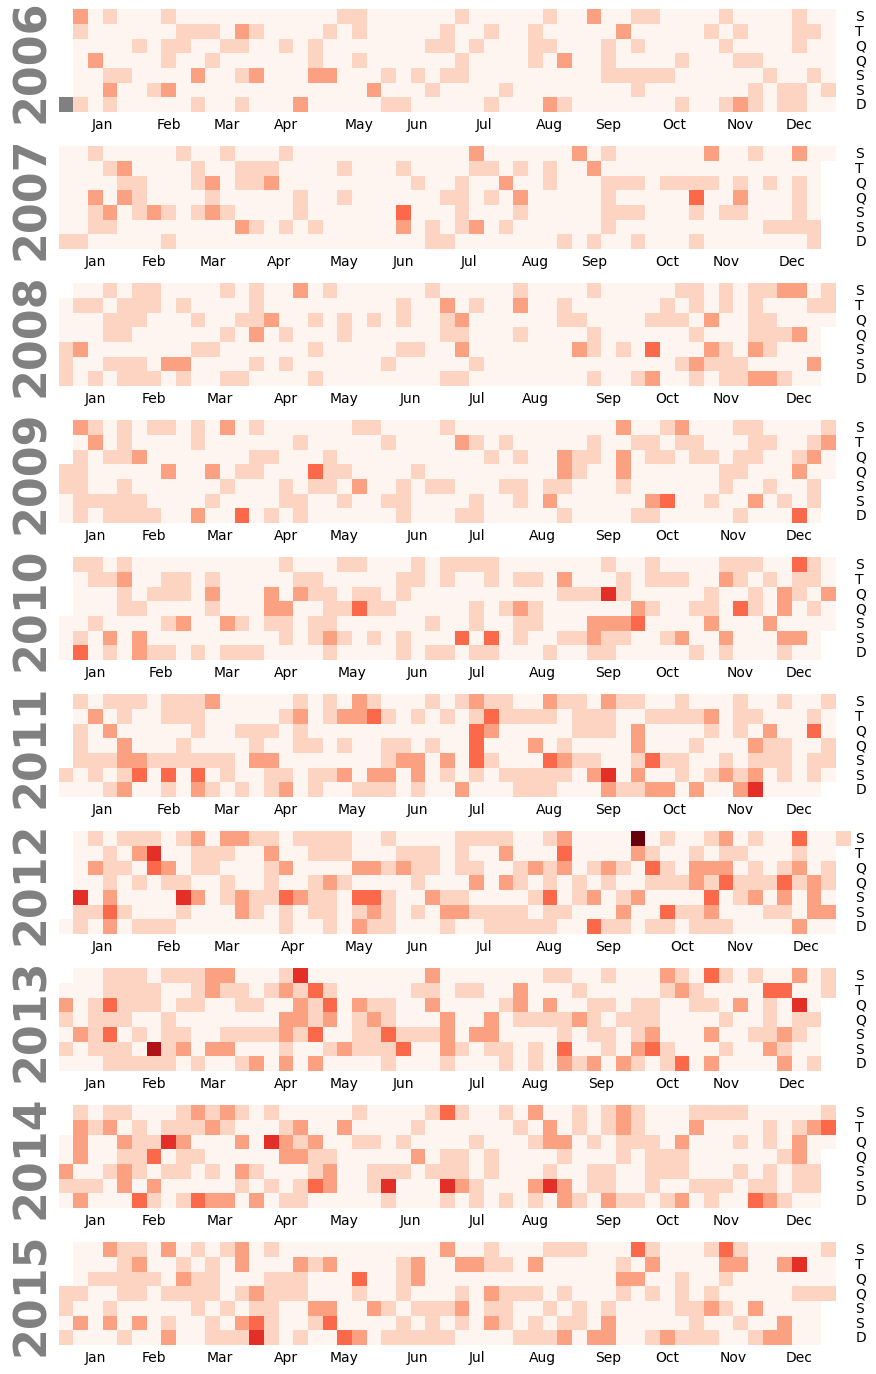

In [187]:
events = ocorrencia["dia_ocorrencia"].value_counts().sort_values()
events.index = pd.to_datetime(events.index)

calmap.calendarplot(events, daylabels='STQQSSD',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(20, 14)))

In [193]:
len(events)/3650

0.4136986301369863

In [192]:
events.sort_values(ascending = False)

2012-09-24    6
2013-02-16    5
2013-12-18    4
2012-01-06    4
2015-04-05    4
             ..
2007-01-27    1
2012-11-29    1
2009-04-25    1
2010-02-19    1
2007-09-19    1
Name: dia_ocorrencia, Length: 1510, dtype: int64

In [77]:
ocorr_ano = ocorrencia["ano"].value_counts().sort_index()

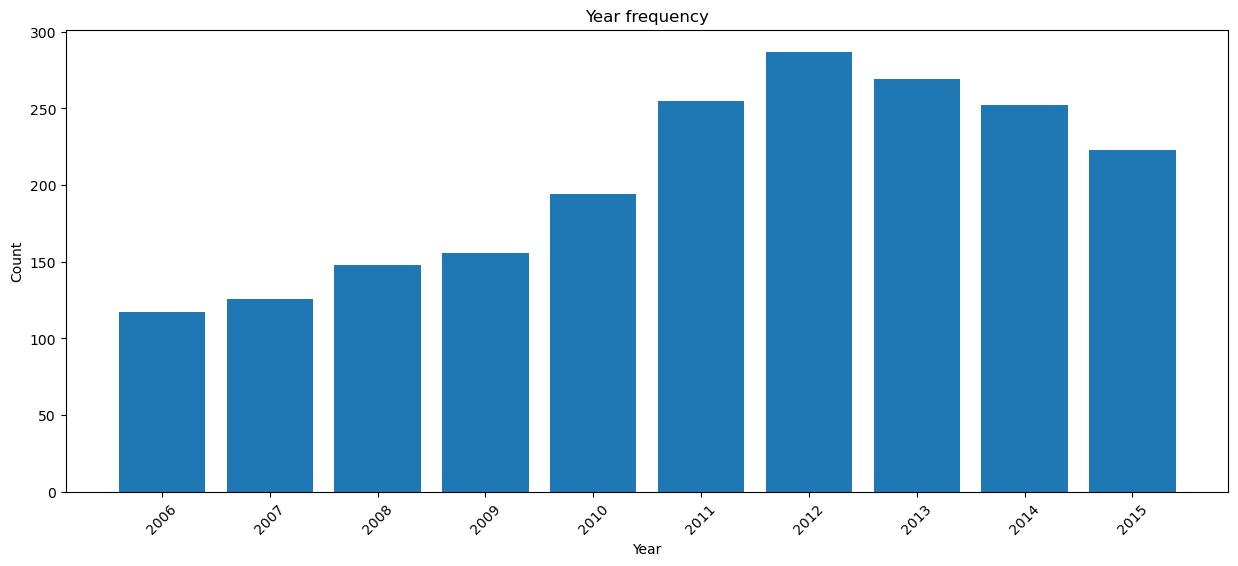

In [80]:
create_barplot_xaxisrot(x = ocorr_ano.index, y = ocorr_ano, labels = ocorr_ano.index, 
                        xaxis = 'Year', yaxis = 'Count', title = 'Year frequency',
                      figsizex = 15, figsizey = 6)

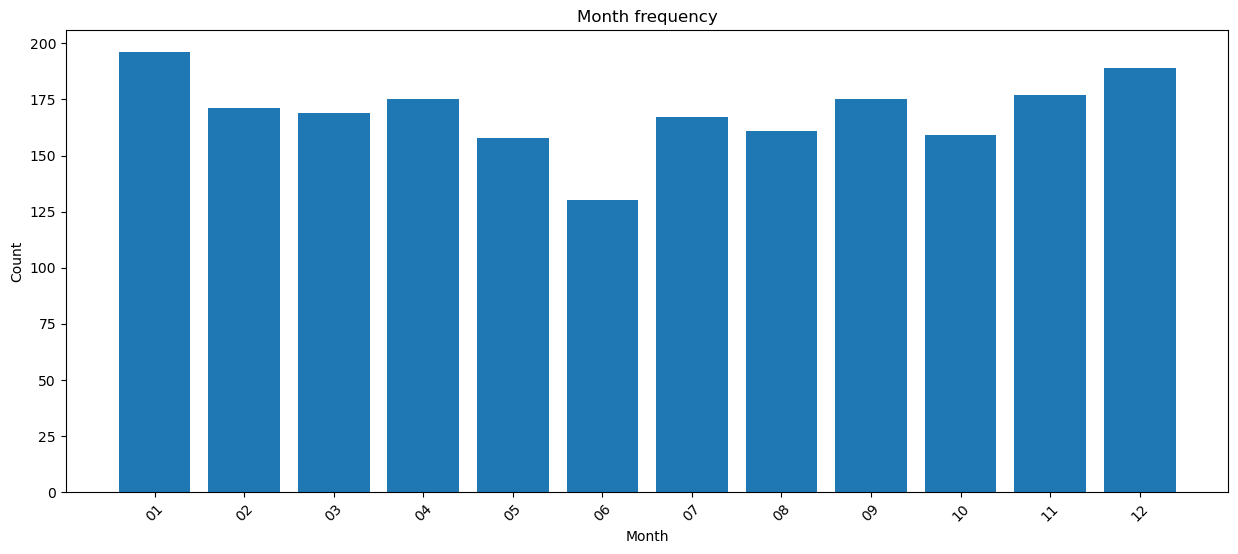

In [81]:
ocorr_mes = ocorrencia["mes"].value_counts().sort_index()
create_barplot_xaxisrot(x = ocorr_mes.index, y = ocorr_mes, labels = ocorr_mes.index, 
                        xaxis = 'Month', yaxis = 'Count', title = 'Month frequency',
                      figsizex = 15, figsizey = 6)

9. horario
    * hora

In [71]:
ocorrencia["horario"].sort_values()

2024    00:00:00
2023    00:00:00
623     00:00:00
2025    00:00:00
2021    00:00:00
          ...   
1778    23:43:00
646     23:45:00
1037    23:50:00
1625    23:53:00
1446    23:58:00
Name: horario, Length: 2027, dtype: object

10. sera_investigada
    * qualitativa nominal; quantitativa discreta binária

In [92]:
ocorrencia["sera_investigada"].value_counts()

SIM    1820
***     203
NÃO       4
Name: sera_investigada, dtype: int64

In [91]:
ocorrencia["sera_investigada"].value_counts()/sum(ocorrencia["sera_investigada"].value_counts())

SIM    0.897879
***    0.100148
NÃO    0.001973
Name: sera_investigada, dtype: float64

In [73]:
ocorrencia[ocorrencia["sera_investigada"] == "NÃO"]

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao,ano,mes
235,48137,ACIDENTE,COLISÃO EM VOO COM OBSTÁCULO,APUCARANA,PR,BRASIL,SSAP,2006-11-26,18:15:00,NÃO,...,FINALIZADA,A-021/CENIPA/2010,1.0,2010-04-06,0,1,NaN,2016-07-30,2006,11
1422,53465,ACIDENTE,PERDA DE CONTROLE EM VOO,PIRACANJUBA,GO,BRASIL,****,2015-08-09,12:30:00,NÃO,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2015,08
1780,43727,ACIDENTE,PERDA DE CONTROLE NO SOLO,PIACATU,SP,BRASIL,****,2010-12-11,03:00:00,NÃO,...,FINALIZADA,ENCERRADA NO RAI,NaN,NaN,0,1,NaN,2016-07-30,2010,12
2019,60879,ACIDENTE,COLISÃO EM VOO COM OBSTÁCULO,EXTERIOR,EX,PARAGUAI,****,2008-02-03,20:40:00,NÃO,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2008,02


In [86]:
sem_invest = ocorrencia[ocorrencia["sera_investigada"] == "***"]
sem_invest

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao,ano,mes
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2013,05
5,46633,ACIDENTE,FALHA DO MOTOR EM VOO,ABADIA DE GOIÁS,GO,BRASIL,****,2012-11-15,12:40:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2012,11
15,52284,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,ANGRA DOS REIS,RJ,BRASIL,SDAG,2014-08-22,14:30:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2014,08
17,53484,ACIDENTE,FALHA DO MOTOR EM VOO,ANGRA DOS REIS,RJ,BRASIL,****,2015-09-18,13:30:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2015,09
29,53260,ACIDENTE,FALHA DO MOTOR EM VOO,AFONSO CLÁUDIO,ES,BRASIL,****,2015-05-08,11:27:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2015,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,34081,ACIDENTE,COM TREM DE POUSO,EXTERIOR,EX,URUGUAI,****,2008-07-02,00:00:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2008,07
2022,36116,INCIDENTE GRAVE,PERDA DE COMPONENTE EM VOO,MEDELLIN,EX,COLÔMBIA,****,2009-03-26,04:46:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2009,03
2023,33715,INCIDENTE GRAVE,OUTROS TIPOS,LIMA,EX,PERU,****,2006-10-31,00:00:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2006,10
2024,25839,ACIDENTE,COLISÃO COM OBSTÁCULO NO SOLO,MENDONZA,EX,ARGENTINA,****,2006-01-03,00:00:00,***,...,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30,2006,01


In [93]:
sem_invest['tipo'].value_counts().to_frame()

,tipo
PERDA DE CONTROLE EM VOO,44
FALHA DO MOTOR EM VOO,37
PERDA DE CONTROLE NO SOLO,19
INDETERMINADA,17
COLISÃO EM VOO COM OBSTÁCULO,14
OUTROS TIPOS,13
FALHA DE SISTEMA / COMPONENTE,10
COM TREM DE POUSO,10
PANE SECA,6
POUSO BRUSCO,3


In [94]:
sem_invest['classificacao'].value_counts()/sum(sem_invest['classificacao'].value_counts())

ACIDENTE           0.871921
INCIDENTE GRAVE    0.128079
Name: classificacao, dtype: float64

In [85]:
sem_invest['uf'].value_counts()

SP    56
MG    22
PR    18
GO    18
RJ    16
RS    13
SC     8
MT     8
EX     7
BA     6
RO     4
CE     4
ES     4
DF     3
PB     3
SE     2
RN     2
PE     2
PA     2
AP     1
MA     1
AM     1
TO     1
PI     1
Name: uf, dtype: int64

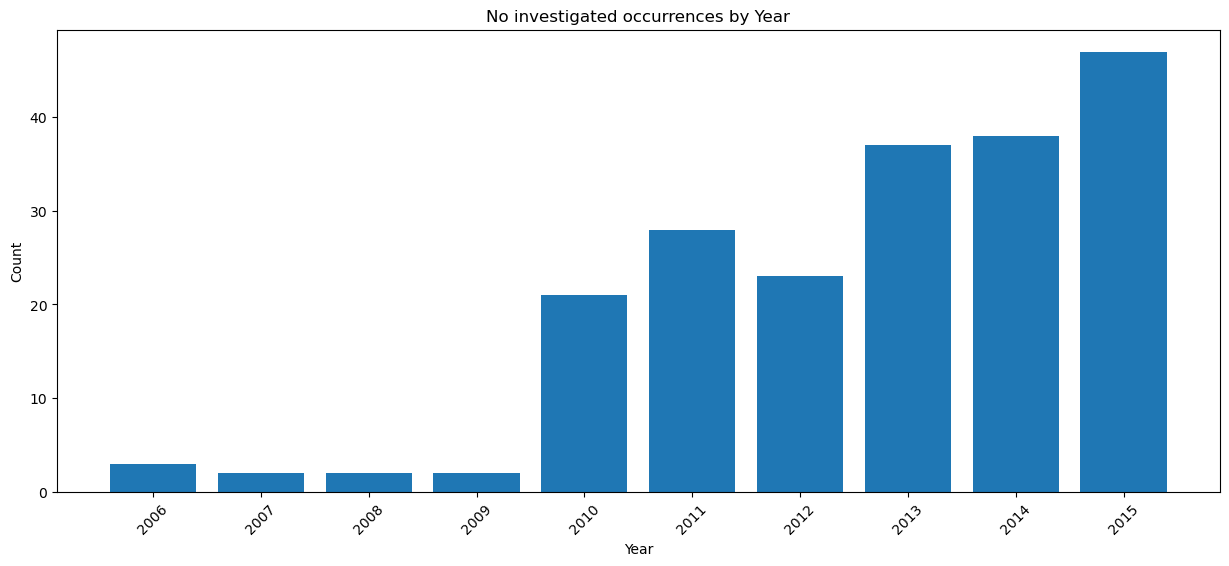

In [95]:
sem_invest_ano = sem_invest['ano'].value_counts().sort_index()
create_barplot_xaxisrot(x = sem_invest_ano.index, y = sem_invest_ano, labels = sem_invest_ano.index, 
                        xaxis = 'Year', yaxis = 'Count', title = 'No investigated occurrences by Year',
                      figsizex = 15, figsizey = 6)

11. comando_investigador
    * qualitativa nominal?
    
Por se tratar de uma variável técnica, não a compreendo bem e, portanto, acho melhor não utilizar.

In [118]:
ocorrencia["comando_investigador"].value_counts()

SERIPA-4    480
SERIPA-5    371
SERIPA-6    348
SERIPA-3    266
SERIPA-2    180
SERIPA-1    166
SERIPA-7    123
CENIPA       92
EXTERIOR      1
Name: comando_investigador, dtype: int64

12. status_investigacao
    * qualitativa nominal

In [121]:
ocorrencia["status_investigacao"].value_counts()/sum(ocorrencia["status_investigacao"].value_counts())

FINALIZADA    0.581549
ATIVA         0.417902
REABERTA      0.000549
Name: status_investigacao, dtype: float64

In [120]:
ocorrencia[ocorrencia["status_investigacao"] == "REABERTA"]

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,...,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao,ano,mes
21,31395,ACIDENTE,OUTROS TIPOS,ANGRA DOS REIS,RJ,BRASIL,****,2008-01-15,11:41:00,SIM,...,REABERTA,A-025/CENIPA/2010,0.0,2010-04-28,9,1,NaN,2016-07-30,2008,01


13. numero_relatorio
    * qualitativa nominal
    
Imaginei que cada ocorrência aérea estivesse associada a um único número de relatório.
    
Todavia, há 493 registros que mapeiam para mais de um número de relatório.

Essa seria uma variável interessante de questionar a um especialista.

Não creio que seja um erro mas algo que contribui para o entendimento do fenômeno.

In [124]:
ocorrencia["numero_relatorio"].value_counts().value_counts()

1      1110
2       110
433       1
55        1
3         1
Name: numero_relatorio, dtype: int64

In [125]:
ocorrencia["numero_relatorio"].value_counts().sort_values(ascending = False)

A DEFINIR             433
ENCERRADA NO RAI       55
A-035/CENIPA/2013       3
A-017/CENIPA/2014       2
A-175/CENIPA/2013       2
                     ... 
A-032/CENIPA/2012       1
IG-195/CENIPA/2014      1
A-049/CENIPA/2009       1
A-085/CENIPA/2012       1
A-158/CENIPA/2013       1
Name: numero_relatorio, Length: 1223, dtype: int64

In [130]:
ocorrencia[ocorrencia["numero_relatorio"] == "A-035/CENIPA/2013"][['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf', 'numero_relatorio']]

,codigo_ocorrencia,classificacao,tipo,localidade,uf,numero_relatorio
68,47661,ACIDENTE,COLISÃO COM OBSTÁCULO NO SOLO,ATALAIA DO NORTE,AM,A-035/CENIPA/2013
1433,47025,ACIDENTE,FALHA DO MOTOR EM VOO,GUAPIAÇU,SP,A-035/CENIPA/2013
1745,41900,ACIDENTE,FALHA DE SISTEMA / COMPONENTE,NOVO HORIZONTE,SP,A-035/CENIPA/2013


14. relatorio_publicado
    * qualitativa nominal; quantitativa discreta binária
15. dia_publicacao 
    * data

16. quantidade_recomendacoes 
    * quantitativa discreta

In [150]:
quant_rec_freq = ocorrencia["quantidade_recomendacoes"].value_counts().sort_index().to_frame()
quant_rec_freq = quant_rec_freq.rename(columns = {"quantidade_recomendacoes": "freq_abs"})


perc_quant_rec = quant_rec_freq/sum(quant_rec_freq["freq_abs"])
perc_quant_rec = perc_quant_rec.rename(columns={"freq_abs": "freq_rel"})


df_quant_rec = pd.concat([quant_rec_freq, perc_quant_rec], axis=1)


df_quant_rec.reset_index(inplace=True)
df_quant_rec = df_quant_rec.rename(columns = {"index": "quantidade_recomendacoes"})


df_quant_rec

,quantidade_recomendacoes,freq_abs,freq_rel
0,0,1442,0.711396
1,1,190,0.093735
2,2,143,0.070548
3,3,68,0.033547
4,4,34,0.016774
5,5,22,0.010853
6,6,17,0.008387
7,7,32,0.015787
8,8,14,0.006907
9,9,23,0.011347


17. aeronaves_envolvidas
    * quantitativa discreta

In [133]:
ocorrencia["aeronaves_envolvidas"].value_counts()

1    2013
2      13
4       1
Name: aeronaves_envolvidas, dtype: int64

In [137]:
ocorrencia[ocorrencia["aeronaves_envolvidas"] > 1][['codigo_ocorrencia', 'classificacao', 'tipo', 'localidade', 'uf', 'aeronaves_envolvidas']]

,codigo_ocorrencia,classificacao,tipo,localidade,uf,aeronaves_envolvidas
54,51436,ACIDENTE,COLISÃO DE AERONAVES EM VOO,BRASÍLIA,DF,2
256,51433,ACIDENTE,COLISÃO COM AERONAVE NO SOLO,AMERICANA,SP,2
459,44944,ACIDENTE,COLISÃO DE AERONAVES EM VOO,CORUMBÁ,MS,2
541,45222,INCIDENTE GRAVE,TRÁFEGO AÉREO,CARUARU,PE,2
619,43869,ACIDENTE,COLISÃO DE AERONAVES EM VOO,RIO DE JANEIRO,RJ,2
805,51653,ACIDENTE,PERDA DE CONTROLE EM VOO,CRUZ ALTA,RS,2
855,30375,ACIDENTE,COLISÃO DE AERONAVES EM VOO,PEIXOTO DE AZEVEDO,MT,2
1080,52943,INCIDENTE GRAVE,TRÁFEGO AÉREO,GOIÂNIA,GO,2
1687,52992,INCIDENTE GRAVE,COLISÃO COM AERONAVE NO SOLO,SALVADOR,BA,2
1816,52539,ACIDENTE,COLISÃO DE AERONAVES EM VOO,RIO CLARO,SP,2


18. saida_pista
    * quantitativa discreta binária

In [132]:
ocorrencia["saida_pista"].value_counts()

1.0    248
0.0      8
Name: saida_pista, dtype: int64

19. dia_extracao
    * data

### Aeronave